In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [9]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [10]:
def extract_frames(video_path, max_frames=20):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret or frame_count == max_frames:
            break
        frame = cv2.resize(frame, (224, 224))
        frames.append(frame)
        frame_count += 1
    cap.release()
    return np.array(frames)

In [11]:
def remove_duplicate_frames(frames, threshold=0.95):
    unique_frames = []
    unique_frames.append(frames[0])  
    for i in range(1, len(frames)):
        grayA = cv2.cvtColor(frames[i-1], cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(frames[i], cv2.COLOR_BGR2GRAY)
        
        score, _ = ssim(grayA, grayB, full=True)
        
        if score < threshold: 
            unique_frames.append(frames[i])
    
    return unique_frames

In [12]:
def display_frames(frames):
    for idx, frame in enumerate(frames):
        plt.figure(figsize=(4, 4))
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 
        plt.title(f'Unique Frame {idx + 1}')
        plt.axis('off')
        plt.show()

In [13]:
video_path = 'fight_0117.mpeg'
frames = extract_frames(video_path, max_frames=20)

In [14]:
unique_frames = remove_duplicate_frames(frames, threshold=0.95)

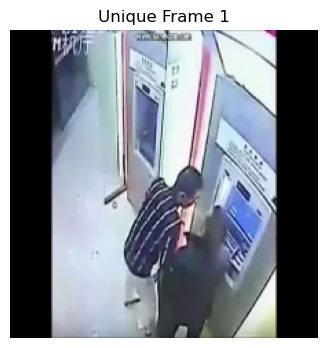

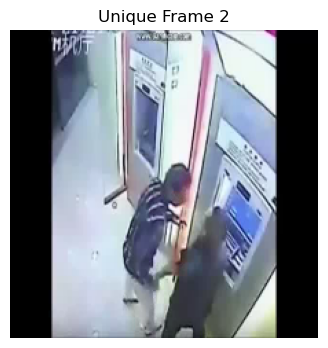

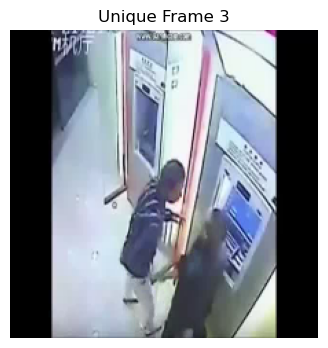

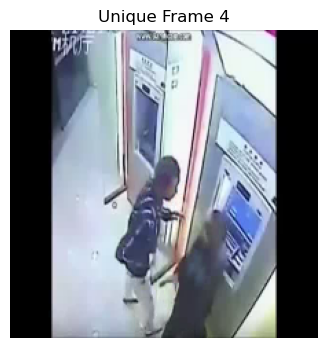

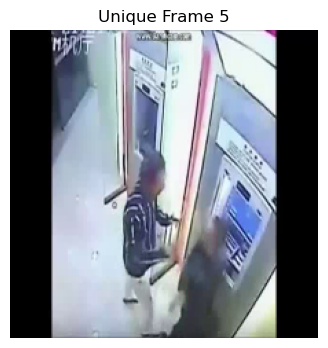

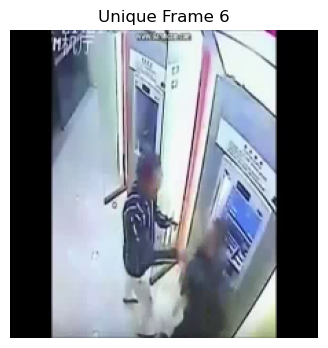

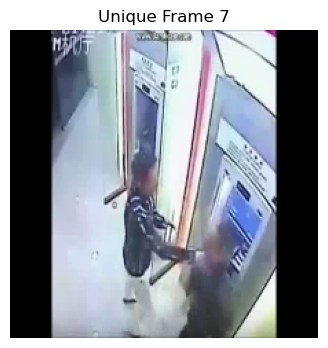

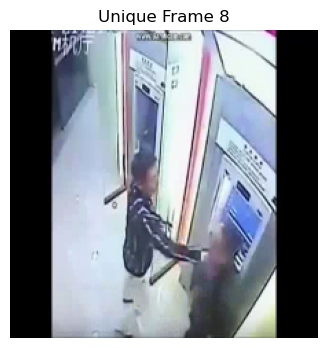

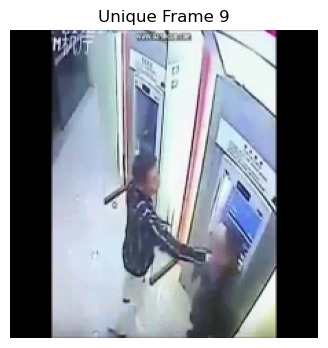

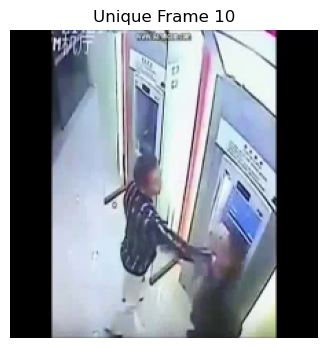

In [15]:
display_frames(unique_frames)